[3 6 5 4] [ 1  4  2 -1]
[3 1] [6 4]


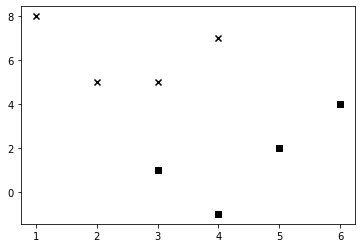

In [7]:
# Building a simple classifier
import numpy as np
import matplotlib.pyplot as plt

# sample datasets
X = np.array([[3,1],[2,5],[1,8],[6,4],[5,2],[3,5],[4,7],[4,-1]])
# sample labels
y = [0, 1, 1, 0, 0, 1, 1, 0]

class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

'''
# compare two method of list representation
print(class_0[:,0],class_0[:,1])
print(class_0[:][0],class_0[:][1])
'''

plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],color='black',marker='s')
plt.scatter(class_1[:,0],class_1[:,1],color='black',marker='x')
plt.show()

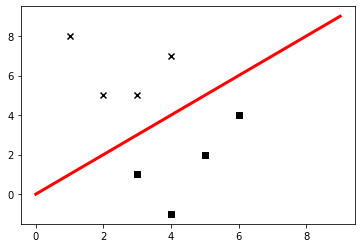

In [9]:
# created a line to separate two lists
line_x = range(10)
line_y = line_x

plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],color='black',marker='s')
plt.scatter(class_1[:,0],class_1[:,1],color='black',marker='x')
plt.plot(line_x,line_y,color='red',linewidth=3)
plt.show()

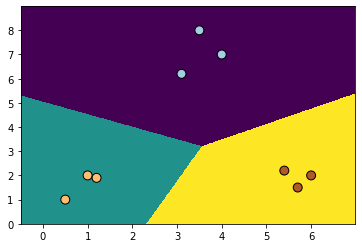

In [8]:
# Building logistic regression
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# initialize logistic regression classifier
# C parameter indicates the penalty for misclassification.As we increase C, there is a higher penalty for misclassification. Hence, the
# boundaries get more optimal.
classifier = linear_model.LogisticRegression(solver='liblinear',C=10000)
classifier.fit(X,y)

# visualization
def plot_classifier(classifier,X,y):
    # define boundaries
    x_min, x_max = min(X[:,0])-1.0 , max(X[:,0])+1.0
    y_min, y_max = min(X[:,1])-1.0 , max(X[:,1])+1.0
    
    # denote mesh grid
    step_size = 0.01
    x_values, y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size))
    
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # plot
    plt.figure()
    # This is basically a 3D plotter that takes the 2D points and the associated values to draw different regions using a color scheme.
    plt.pcolormesh(x_values,y_values,mesh_output,shading='auto')
    
    # overlay the training points on the plot
    plt.scatter(X[:,0],X[:,1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:,0])-1), int(max(X[:,0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:,1])-1), int(max(X[:,1])+1), 1.0)))
    
    plt.show()
    
plot_classifier(classifier,X,y)


Accuracy of GaussianNB Classifier is  0.2 %


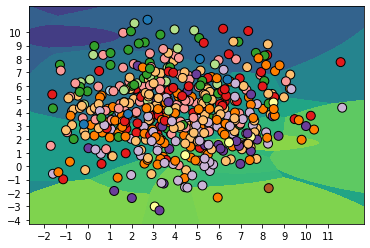

Accuracy of the classifier = 0.2 %


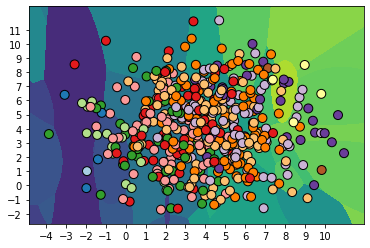

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [12]:
# Building a Naive Bayes classifier using GaussianNB
from sklearn.naive_bayes import GaussianNB
from random import shuffle
# initialize datasets
input_file = 'data_multivars.txt'

'''
X, Y = [], []
with open(input_file,'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        Y.append(data[-1])
X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)
'''
def load_dataset(input_file):
    X,Y = [], []
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data[1:-1])
            Y.append(data[-1])  
    return np.array(X[1:]).astype(np.float32), np.array(Y[1:]).astype(np.float32)

X, Y = load_dataset(input_file)

# training gaussiannb model
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X,Y.astype('int'))
Y_pred = classifier_gaussiannb.predict(X)

# evaluation
accuracy = 100 * (Y==Y_pred).sum()/X.shape[0]
print("\nAccuracy of GaussianNB Classifier is ",round(accuracy,2),"%")

# plot
plot_classifier(classifier_gaussiannb,X,Y)


from sklearn.naive_bayes import GaussianNB
import numpy as np
input_file = 'data_multivars.txt'
X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-2])
        y.append(data[-1])
X = np.array(X)
y = np.array(y)

classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y.astype('int'))
y_pred = classifier_gaussiannb.predict(X)
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")
plot_classifier(classifier_gaussiannb, X, y)


'''
# define plot feature importances function
def plot_feature_importances(feature_importances,title,feature_names):
    # Normalize the importance values
    feature_importances = 100 * (feature_importances/max(feature_importances))
    
    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(feature_importances))
    
    # Center the location of the labels on the X-axis
    pos = np.arange(index_sorted.shape[0])+0.5
    
    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()
    
# plot relative impoartance of each feature using regressor object : feature_importances_
plot_feature_importances(dt_regressor.feature_importances_,'Decision Tree Regressor', housing_data.feature_names)
'''


 Accuracy of the gaussiannb classifier is 0.0


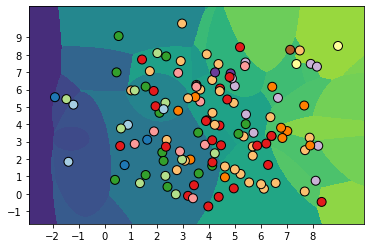

In [20]:
# splitting the dataset and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train.astype('int'))

y_test_pred = classifier_gaussiannb_new.predict(X_test)

accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("\n Accuracy of the gaussiannb classifier is",round(accuracy,2))

plot_classifier(classifier_gaussiannb_new, X_test, y_test)

num_validations = 5
accuracy = cross_val_score(classifier_gaussiannb,X,y.astype('int'),scoring='accuracy',cv=num_validations)
print("\nAccuracy ",round(100*accuracy.mean(),2))

f1 = cross_val_score(classifier_gaussiannb,X, y.astype('int'), scoring='f1_weighted', cv=num_validations)
print ("F1: " + str(round(100*f1.mean(), 2)) + "%")
precision = cross_val_score(classifier_gaussiannb,X, y.astype('int'), scoring='precision_weighted', cv=num_validations)
print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")
recall = cross_val_score(classifier_gaussiannb,X, y.astype('int'), scoring='recall_weighted', cv=num_validations)
print ("Recall: " + str(round(100*recall.mean(), 2)) + "%")

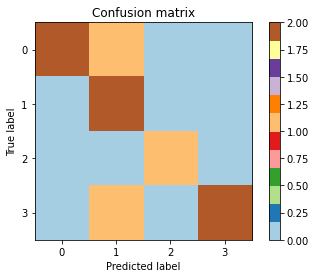

In [30]:
# using imshow function to plot confusion matrix
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]

# Show confusion matrix
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Paired)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

confusion_mat = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(confusion_mat)

In [31]:
# extract performance report : scikit-learn
from sklearn.metrics import classification_report
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



In [35]:
line='vhigh,vhigh,2,2,small,low,unacc'
ll=line[:-1].split(',')
print(type(ll))
print(ll)

lm = line.split(',')[:-1]
print(lm)

<class 'list'>
['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unac']
['vhigh', 'vhigh', '2', '2', 'small', 'low']
